In [76]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette('hls',12)
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal point

In [77]:
train=pd.read_csv('D:/SYSU/21-22third_grade/学习/非参/HW4/train.csv')
test=pd.read_csv('D:/SYSU/21-22third_grade/学习/非参/HW4/test.csv')

In [78]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [79]:
train_ID=train['Id']
test_ID=test['Id']

In [80]:
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)
#drop the "Id" column since it is unnecessary for the prediction process.

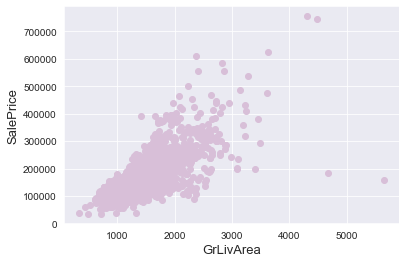

In [81]:
fig,ax=plt.subplots()
ax.scatter(x=train['GrLivArea'],y=train['SalePrice'],color="#D8BFD8")
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('GrLivArea',fontsize=13)
plt.show()

In [82]:
train=train.drop(train[(train['GrLivArea']>4000)&(train['SalePrice']<300000)].index)

In [75]:
Y_train=pd.DataFrame(train['SalePrice'])
Y_train.columns=['SalePrice']
outputpath='D:\\SYSU\\21-22third_grade\\学习\\非参\\HW4\\y_train.csv'
y_train.to_csv(outputpath,sep=',',index=False,header=True)

In [154]:
logy_train=pd.DataFrame(y_train)
outputpath='D:\\SYSU\\21-22third_grade\\学习\\非参\\HW4\\SalePrice_log.csv'
logy_train.to_csv(outputpath,sep=',',index=False,header=True)

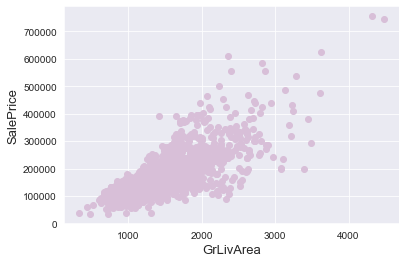

In [83]:
fig,ax=plt.subplots()
ax.scatter(x=train['GrLivArea'],y=train['SalePrice'],color="#D8BFD8")
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('GrLivArea',fontsize=13)
plt.show()


 mu= 180932.92 and sigma=79467.79



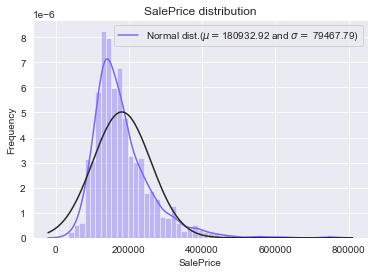

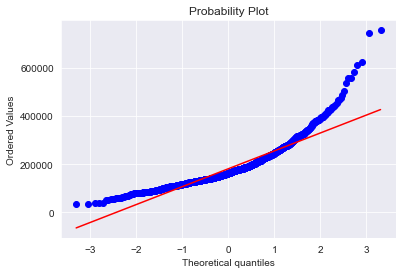

In [84]:
ax=sns.distplot(train['SalePrice'],fit=norm,color="#7B68EE")
hist_fig = ax.get_figure()


(mu,sigma)=norm.fit(train['SalePrice'])
print('\n mu= {:.2f} and sigma={:.2f}\n'.format(mu,sigma))

plt.legend(['Normal dist.($\mu=${:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig=plt.figure()
res=stats.probplot(train['SalePrice'],plot=plt)
plt.show()


In [86]:
train['SalePrice']=np.log1p(train['SalePrice'])


 mu= 12.02 and sigma=0.40



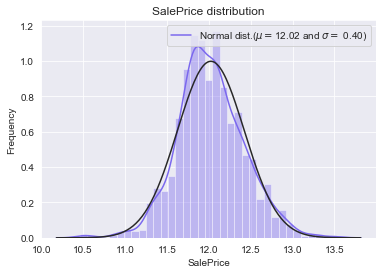

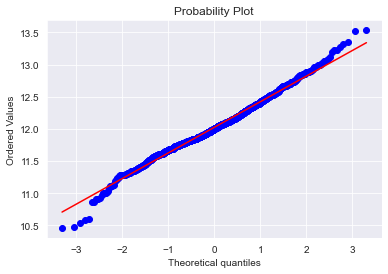

In [87]:
ax=sns.distplot(train['SalePrice'],fit=norm,color="#7B68EE")
hist_fig = ax.get_figure()
(mu,sigma)=norm.fit(train['SalePrice'])
print('\n mu= {:.2f} and sigma={:.2f}\n'.format(mu,sigma))

plt.legend(['Normal dist.($\mu=${:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig=plt.figure()
res=stats.probplot(train['SalePrice'],plot=plt)
plt.show()

In [88]:
ntrain=train.shape[0]
ntest=test.shape[0]
y_train=train.SalePrice.values
all_data=pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)
#为了使test和train的data进行同样的预处理，合并为一个all_data

In [89]:
missing=all_data.isnull().sum().reset_index().rename(columns={0:'missNum'})

In [90]:
missing['missRate']=missing['missNum']/all_data.shape[0]
miss_analy=missing[missing.missRate>0].sort_values(by='missRate', ascending=False)[:30].reset_index(drop=True)
miss_analy.head(20)

,index,missNum,missRate
0,PoolQC,2908,0.997
1,MiscFeature,2812,0.964
2,Alley,2719,0.932
3,Fence,2346,0.804
4,FireplaceQu,1420,0.487
5,LotFrontage,486,0.167
6,GarageFinish,159,0.055
7,GarageQual,159,0.055
8,GarageCond,159,0.055
9,GarageYrBlt,159,0.055


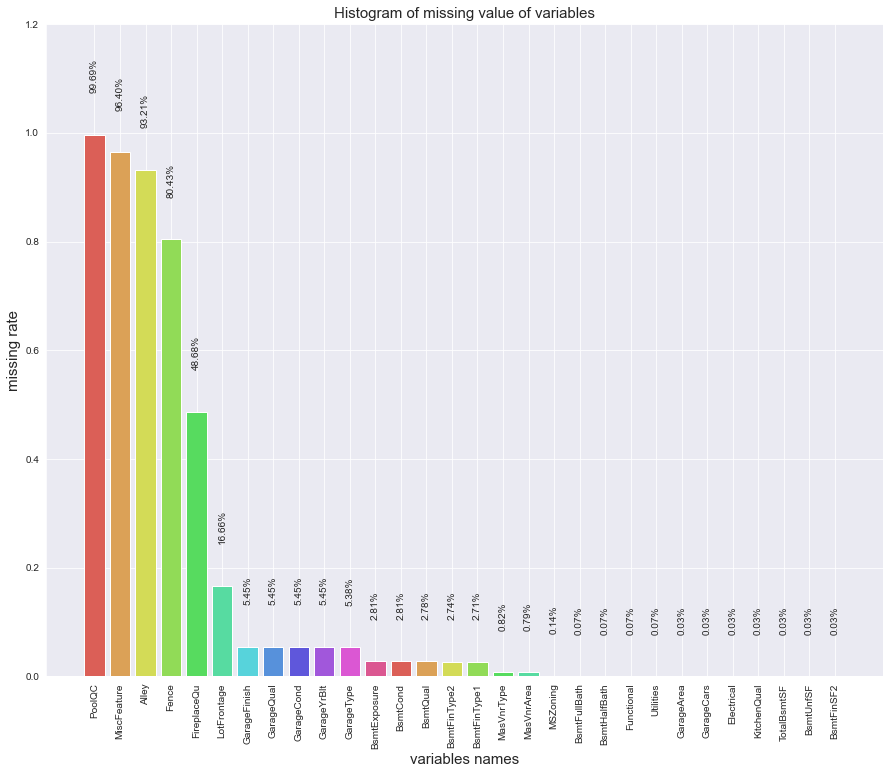

In [91]:
fig=plt.figure(figsize=(15,12))
plt.bar(np.arange(miss_analy.shape[0]),list(miss_analy.missRate.values),align='center',color=sns.color_palette('hls',12))
font={'size':15,}
plt.title('Histogram of missing value of variables',fontsize=15)
plt.xlabel('variables names',font)
plt.ylabel('missing rate',font)
# 添加x轴标签，并旋转90度
plt.xticks(np.arange(miss_analy.shape[0]),list(miss_analy['index']))
plt.xticks(rotation=90)
# 添加数值显示
for x,y in enumerate(list(miss_analy.missRate.values)):
     plt.text(x,y+0.08,'{:.2%}'.format(y),ha='center',rotation='90')    
plt.ylim([0,1.2])

<AxesSubplot:>

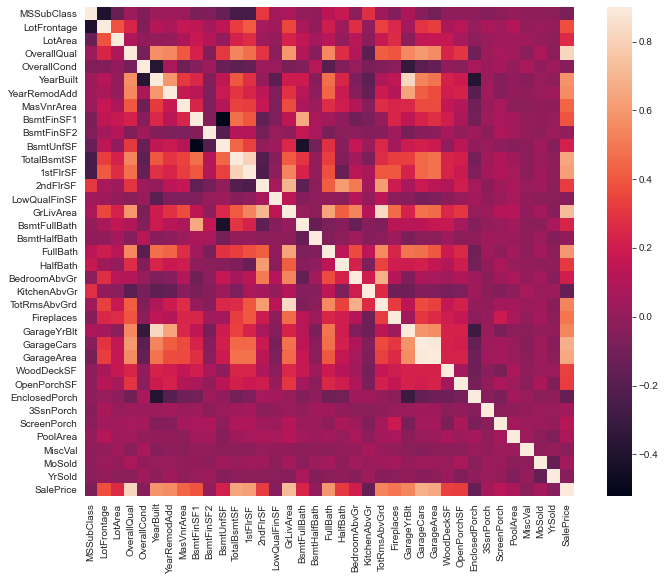

In [92]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [93]:
all_data['PoolQC']=all_data['PoolQC'].fillna('None')

In [94]:
all_data['MiscFeature']=all_data['MiscFeature'].fillna('None')

In [95]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [96]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [97]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [98]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
#transform——对各组进行处理得到结果并返回对应原df，此处可在各组的na上填充各组的median

In [99]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [100]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [101]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [102]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [103]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [104]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
#RL出现最多，mode()即取最常出现的值

In [105]:
all_data['Utilities'].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [106]:
all_data['Utilities'][ntrain:].value_counts()
#然后我们发现基本都是allpub,且唯一出现的Nosewa在train中并没有

AllPub    1457
Name: Utilities, dtype: int64

In [107]:
all_data = all_data.drop(['Utilities'], axis=1)
#因此我们决定drop掉此变量

In [108]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")
#data description 上说na就是typical的意思

In [109]:
all_data['Electrical'].value_counts()

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [110]:
all_data['Electrical']=all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
#填入出现频率最高的那个
#接下来都是只有一个miss value 的，都选取出现最多的

In [111]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [112]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [113]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [114]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [115]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()
#芜湖 没有missingvalues了

,Missing Ratio


In [116]:
#接下来将一些数值型转为categorial variable
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
#将building class 转为字符，并不是数值型，不能比大小

In [117]:
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

In [118]:
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [119]:
#Label Encoding some categorical variables that may contain information in their ordering set
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))
#规范化处理

In [120]:
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [121]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


In [122]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 58 skewed numerical features to Box Cox transform


In [123]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 219)


In [124]:
train=all_data[:ntrain]
test=all_data[ntrain:]

In [151]:
outputpath='D:\\SYSU\\21-22third_grade\\学习\\非参\\HW4\\train_GAM.csv'
train.to_csv(outputpath,sep=',',index=False,header=True)

In [152]:
outputpath='D:\\SYSU\\21-22third_grade\\学习\\非参\\HW4\\test_GAM.csv'
test.to_csv(outputpath,sep=',',index=False,header=True)

In [127]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,confusion_matrix
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [128]:
n_folds = 5

def msle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    mse= -cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf,n_jobs=-1)
    return(mse)


In [129]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [130]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [131]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [132]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [135]:
#eg:使用网格搜索选择最优超参数——学习率、树的数量
def par(model):
    learning_rate=[0.0001,0.001,0.01,0.05,0.1,0.2]
    n_estimators=[0,1000,2000]
    param_grid=dict(learning_rate=learning_rate,n_estimators=n_estimators)
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    grid_search=GridSearchCV(model,param_grid,scoring='neg_mean_squared_error',cv=kf,n_jobs=-1)
    grid_result=grid_search.fit(train.values,y_train)
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    return(grid_result.best_params_)

In [136]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.01, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, 
                             random_state =7, nthread = -1)

In [137]:
#对lgb的学习率参数进行调优，得到最优值为0.05
par(model_lgb)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
nan (nan) with: {'learning_rate': 0.0001, 'n_estimators': 0}
-0.143123 (0.011982) with: {'learning_rate': 0.0001, 'n_estimators': 1000}
-0.128637 (0.011196) with: {'learning_rate': 0.0001, 'n_estimators': 2000}
nan (nan) with: {'learning_rate': 0.001, 'n_estimators': 0}
-0.062572 (0.006862) with: {'learning_rate': 0.001, 'n_estimators': 1000}
-0.034348 (0.004147) with: {'learning_rate

{'learning_rate': 0.01, 'n_estimators': 2000}

In [62]:
#输出各学习率下的得分，并返回最优的参数值
par(model_xgb)

-132.962162 (0.416191) with: {'learning_rate': 0.0001, 'n_estimators': 0}
-108.919883 (0.386046) with: {'learning_rate': 0.0001, 'n_estimators': 1000}
-89.230897 (0.357205) with: {'learning_rate': 0.0001, 'n_estimators': 2000}
-132.962162 (0.416191) with: {'learning_rate': 0.001, 'n_estimators': 0}
-18.150418 (0.164486) with: {'learning_rate': 0.001, 'n_estimators': 1000}
-2.522457 (0.053125) with: {'learning_rate': 0.001, 'n_estimators': 2000}
-132.962162 (0.416191) with: {'learning_rate': 0.01, 'n_estimators': 0}
-0.014523 (0.001439) with: {'learning_rate': 0.01, 'n_estimators': 1000}
-0.013543 (0.001489) with: {'learning_rate': 0.01, 'n_estimators': 2000}
-132.962162 (0.416191) with: {'learning_rate': 0.05, 'n_estimators': 0}
-0.013861 (0.001487) with: {'learning_rate': 0.05, 'n_estimators': 1000}
-0.013822 (0.001481) with: {'learning_rate': 0.05, 'n_estimators': 2000}
-132.962162 (0.416191) with: {'learning_rate': 0.1, 'n_estimators': 0}
-0.013986 (0.001867) with: {'learning_rate':

{'learning_rate': 0.01, 'n_estimators': 2000}

In [63]:
#计算R方
GBoost.fit(train.values,y_train)
y_pred=GBoost.predict(train.values)
print('R square: {}'.format(metrics.r2_score(y_train,y_pred)))

R square: 0.9845126714151072


In [64]:
#计算R方
model_xgb.fit(train.values,y_train)
y_pred=model_xgb.predict(train.values)
print('R square: {}'.format(metrics.r2_score(y_train,y_pred)))

R square: 0.951368147166869


In [65]:
#计算R方
model_lgb.fit(train.values,y_train)
y_pred=model_lgb.predict(train.values)
print('R square: {}'.format(metrics.r2_score(y_train,y_pred)))

R square: 0.9670290028044588


In [66]:
#计算mse
score=msle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0127 (0.0017)



In [67]:
#计算mse
score = msle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.0133 (0.0017)



In [68]:
score = msle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.0139 (0.0019)



In [69]:
score = msle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0135 (0.0015)



In [70]:
score = msle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

LGBM score: 0.0134 (0.0020)



In [71]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [72]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = msle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0119 (0.0017)



In [73]:
#计算R方
averaged_models.fit(train.values,y_train)
y_pred=averaged_models.predict(train.values)
print('R square: {}'.format(metrics.r2_score(y_train,y_pred)))

R square: 0.9598757647466997


In [74]:
y=pd.DataFrame(y_train)

In [75]:
out=pd.concat([train,y],axis=1)

In [76]:
out.to_excel(excel_writer = r"C:\Users\10048\Desktop\导出结果.xlsx")

In [77]:
outtest=test

In [78]:
outtest.to_excel(excel_writer = r"C:\Users\10048\Desktop\test.xlsx")

In [138]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Condition2_RRAn,53.981
RoofMatl_Membran,53.981
Exterior2nd_Other,53.981
Condition2_RRAe,53.981
MiscFeature_TenC,53.981
Exterior1st_ImStucc,53.981
Electrical_Mix,53.981
RoofMatl_Metal,53.981
Heating_Floor,53.981
RoofMatl_Roll,53.981


In [139]:
import shap
shap.initjs()

In [140]:
model=GBoost.fit(train.values,y_train)
explainer = shap.TreeExplainer(model)

In [141]:
shap_values = explainer.shap_values(train.values)  # 传入特征矩阵X，计算SHAP值

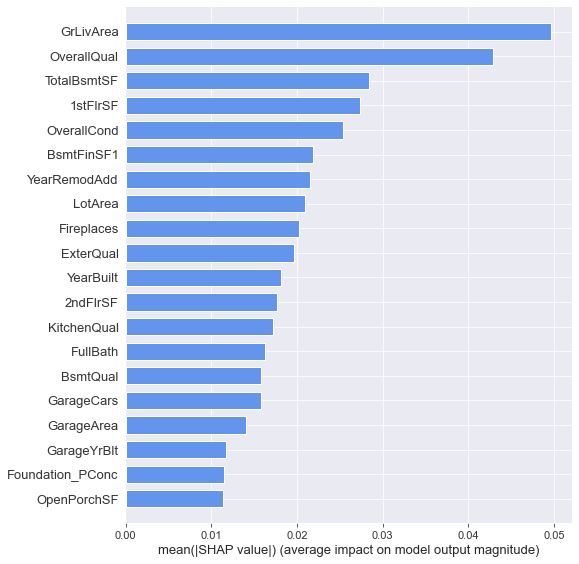

In [150]:
f=shap.summary_plot(shFLap_values, train, plot_type="bar",color= '#6495ED')

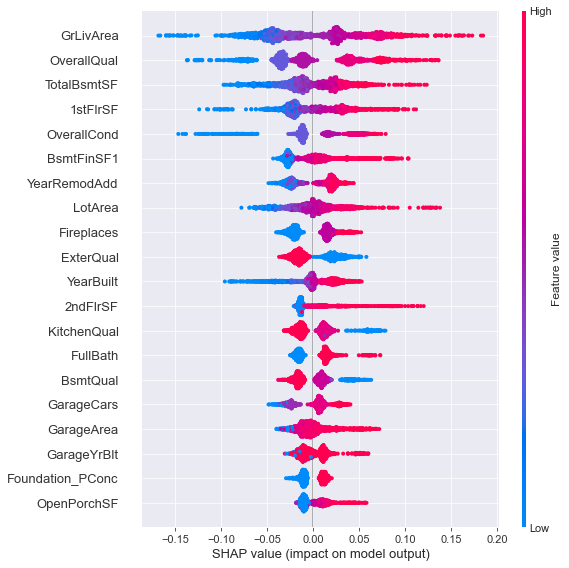

In [84]:
shap.summary_plot(shap_values, train)

shap.dependence_plot("GrLivArea", shap_values, train)

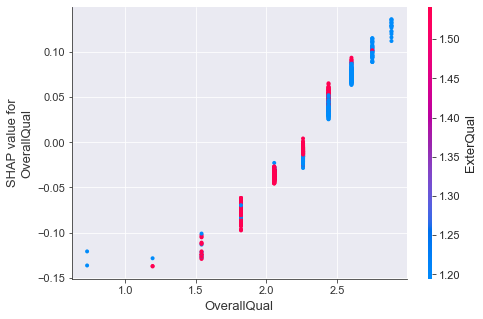

In [86]:
shap.dependence_plot("OverallQual", shap_values, train)

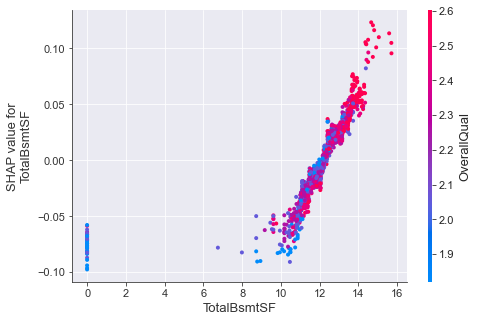

In [87]:
shap.dependence_plot("TotalBsmtSF", shap_values, train)

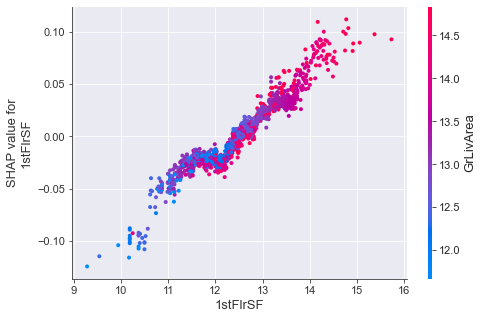

In [88]:
shap.dependence_plot("1stFlrSF", shap_values, train)